In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv(r"C:\Users\Admin\Downloads\titanic_train.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# start our eda
# first we find out the missing values

In [6]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

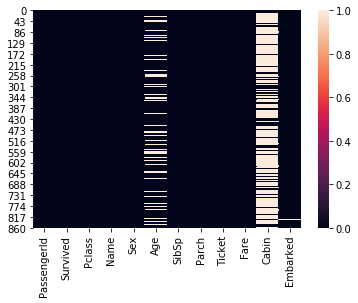

In [8]:
sns.heatmap(train.isnull())

In [9]:
# Roughly 20 percent of the Age data is missing. 
# The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. 
# Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level.
# We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

In [11]:
177/891 # % of age data missing

0.19865319865319866

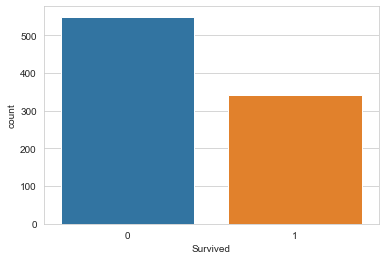

In [13]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=train)

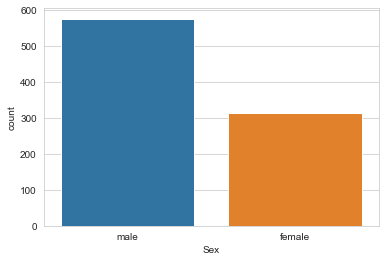

In [16]:
sns.countplot("Sex",data=train)

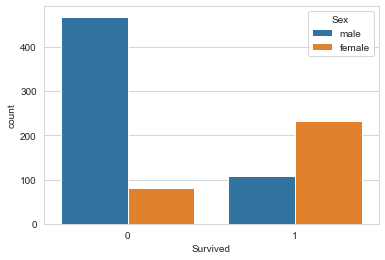

In [17]:
sns.countplot("Survived",hue="Sex",data=train)

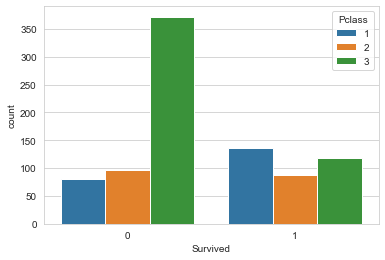

In [19]:
sns.countplot("Survived",hue="Pclass",data=train)

# p class 1 is best, 3rd class is cheapest

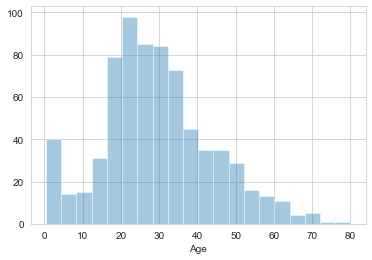

In [23]:
sns.distplot(train["Age"].dropna(),kde=False,bins=20)

# most people were in the age group 17-30

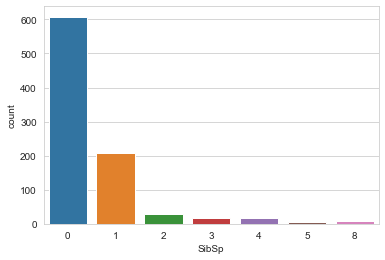

In [25]:
sns.countplot(x="SibSp",data=train)

# how many sibling or spouse were present

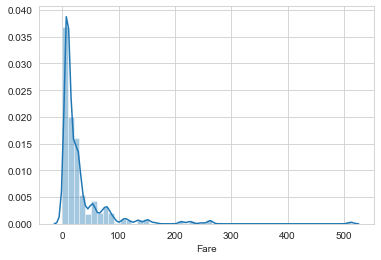

In [27]:
sns.distplot(train["Fare"],bins=50)

In [28]:
# DATA CLEANING
# We want to fill in missing age data instead of just dropping the missing age data rows.
# One way to do this is by filling in the mean age of all the passengers (imputation).
# However we can be smarter about this and check the average age by passenger class. For example:

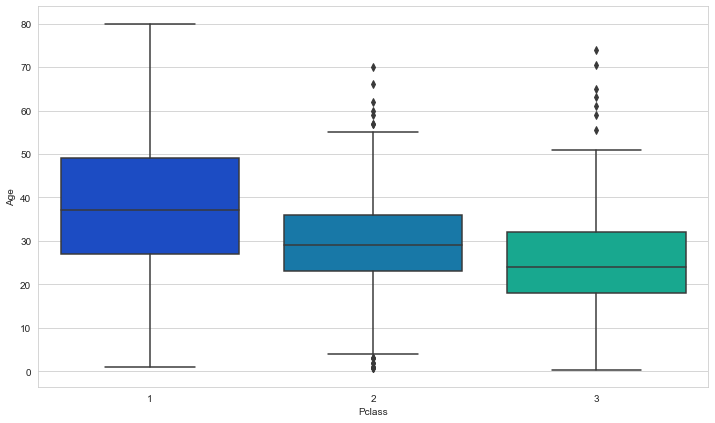

In [29]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [30]:
# We can see the wealthier passengers in the higher classes tend to be older, which makes sense.
# We'll use these average age values to impute based on Pclass for Age.

In [31]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [32]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

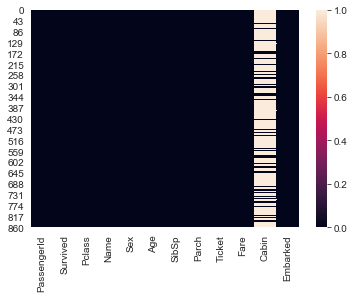

In [34]:
sns.heatmap(train.isnull())

In [36]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
train.drop("Cabin",axis=1,inplace=True)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [40]:
pd.get_dummies(train["Embarked"],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [41]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [42]:
embark=pd.get_dummies(train["Embarked"],drop_first=True)
sex=pd.get_dummies(train["Sex"],drop_first=True)

In [43]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [46]:
train.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

In [47]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [48]:
train=pd.concat([train,sex,embark],axis=1)

In [49]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [50]:
# our data is ready for our model